# Electric Vehicle Sales Analysis in India
A Comprehensive Analysis of EV Sales Trends, Regional Performance, and Market Opportunities

## 📌 Overview
This project analyzes electric vehicle (EV) sales data across Indian states from 2014 to 2023. It identifies growth trends, regional disparities, and market opportunities through data visualization, regression modeling, and forecasting.

## Key Objectives:

Identify yearly/monthly sales trends.

Compare state-wise EV adoption rates.

Analyze vehicle category performance.

Forecast future sales and provide actionable insights.

## 🔍 Key Insights
### 1. Sales Trends
**Yearly Growth**: Sales surged from 14,200 units (2014) to 1,140,800 units (2023) – an 80x increase.

**Peak Month**: December recorded the highest sales (205,458 units), likely due to year-end incentives.

**Forecast**: Sales expected to reach ~1.64 million units by 2029 (Prophet model).

### 2. Regional Performance
**Top States**:

Maharashtra (265,125 units)

Gujarat (192,450 units)

Karnataka (176,800 units)

**Underperforming States**: Bihar, Jharkhand, and Telangana (<10,000 units).

### 3. Vehicle Categories
**Dominant Segment**: Two-wheelers (54.5% of total sales).

**Untapped Potential**: 27 vehicle classes (e.g., cargo vehicles) had zero sales.

### 4. Model Performance
**Regression Analysis**:

R² Score: 0.86 (strong correlation).

MAE: 29.4 (average prediction error).

## 🛠️ Technical Details
                                
### Tools & Libraries
**Python**: Pandas, NumPy, Matplotlib, Seaborn.

**Machine Learning**: Scikit-learn (Linear Regression).

**Forecasting**: Facebook Prophet.

### Data Processing
Removed zero-sales entries for accurate analysis.

Encoded categorical variables (State, Vehicle Class) for regression.

### Visualizations
**Heatmaps**: Highlighted state-year sales trends.

**Bar Charts**: Compared state/category performance.

**Forecast Plot**: 5-year sales trajectory with confidence intervals.

# Electric Vehicle Sales by State in India

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

## Import data 

In [2]:
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

In [3]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


## Data Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [5]:
# Checking Null Values 
df.isna().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [11]:
# Checking Duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
# Assigning Index Name & Starts from 1
df.index.name = "Id"
df.index = df.index+1

In [8]:
# Checing data types
df.dtypes

Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

In [9]:
# Change Year Column data type 
df.Year = df.Year.astype(int)

In [10]:
# The data in the Month_Name column first letter capitalized for better view
df.Month_Name = df.Month_Name.str.capitalize()

In [11]:
# Date colum datetype changes into datetime format
df.Date = pd.to_datetime(df.Date,format="%m/%d/%Y")

In [12]:
df.Date

Id
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
5       2014-01-01
           ...    
96841   2023-12-01
96842   2023-12-01
96843   2023-12-01
96844   2023-12-01
96845   2023-12-01
Name: Date, Length: 96845, dtype: datetime64[ns]

In [13]:
# Change dateype of EV_Sales Quantity Column
df.EV_Sales_Quantity = df.EV_Sales_Quantity.astype(int)

In [14]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Id,,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
2,2014,Jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
3,2014,Jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
4,2014,Jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
5,2014,Jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
96841,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96842,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96843,2023,Dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0


## EDA & Visualization 

### Cheking unique Values over the all columns

In [15]:
# Create function for unique value Checking
def unique_value_checking(df_column):
    print("List of unique values : " ,df_column.unique())
    print("No of unique values : ", len(df_column.unique()))

In [16]:
# Year Column checking
unique_value_checking(df.Year)

List of unique values :  [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
No of unique values :  11


In [25]:
# From 2014 to 2024 having 11 years of data is here

In [26]:
# Month_Name Column Checking if there Unusual Data
unique_value_checking(df.Month_Name)

List of unique values :  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
No of unique values :  12


In [27]:
# Date Column Uniqueness Cheking
unique_value_checking(df.Date)

List of unique values :  <DatetimeArray>
['2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00',
 '2017-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00',
 '2023-01-01 00:00:00',
 ...
 '2014-12-01 00:00:00', '2015-12-01 00:00:00', '2016-12-01 00:00:00',
 '2017-12-01 00:00:00', '2018-12-01 00:00:00', '2019-12-01 00:00:00',
 '2020-12-01 00:00:00', '2021-12-01 00:00:00', '2022-12-01 00:00:00',
 '2023-12-01 00:00:00']
Length: 121, dtype: datetime64[ns]
No of unique values :  121


In [28]:
# Conclusion from the checking the date totally having 121 days of sales record present in the dataset

In [29]:
# State Column Cheking
unique_value_checking(df.State)

List of unique values :  ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Andaman & Nicobar Island'
 'Bihar' 'Chhattisgarh' 'Chandigarh' 'DNH and DD' 'Delhi' 'Goa' 'Gujarat'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Maharashtra' 'Meghalaya' 'Madhya Pradesh' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Puducherry' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttarakhand' 'Uttar Pradesh' 'West Bengal' 'Jammu and Kashmir' 'Manipur']
No of unique values :  34


In [30]:
# Sales done in 34 State in india 

In [31]:
unique_value_checking(df.Vehicle_Class)

List of unique values :  ['ADAPTED VEHICLE' 'AGRICULTURAL TRACTOR' 'AMBULANCE'
 'ARTICULATED VEHICLE' 'BUS' 'CASH VAN' 'CRANE MOUNTED VEHICLE'
 'EDUCATIONAL INSTITUTION BUS' 'EXCAVATOR (COMMERCIAL)' 'FORK LIFT'
 'GOODS CARRIER' 'HARVESTER' 'MAXI CAB' 'M-CYCLE/SCOOTER' 'MOTOR CAB'
 'MOTOR CAR' 'OMNI BUS' 'PRIVATE SERVICE VEHICLE' 'RECOVERY VEHICLE'
 'THREE WHEELER (PASSENGER)' 'TRACTOR (COMMERCIAL)'
 'TRAILER (AGRICULTURAL)' 'TRAILER (COMMERCIAL)'
 'TRAILER FOR PERSONAL USE' 'VEHICLE FITTED WITH RIG'
 'CAMPER VAN / TRAILER' 'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)'
 'DUMPER' 'EXCAVATOR (NT)' 'MOPED' 'THREE WHEELER (PERSONAL)'
 'THREE WHEELER (GOODS)' 'EARTH MOVING EQUIPMENT'
 'MOTOR CYCLE/SCOOTER-USED FOR HIRE' 'CONSTRUCTION EQUIPMENT VEHICLE'
 'M-CYCLE/SCOOTER-WITH SIDE CAR' 'MOBILE WORKSHOP'
 'OMNI BUS (PRIVATE USE)' 'VEHICLE FITTED WITH COMPRESSOR'
 'CAMPER VAN / TRAILER (PRIVATE USE)' 'LUXURY CAB'
 'MOTOR CYCLE/SCOOTER-SIDECAR(T)' 'ANIMAL AMBULANCE' 'BREAKDOWN VAN'
 'FIRE FIGHTI

In [32]:
# Total 73 of Vechicle Class are there

In [33]:
# Checking Vehicle_Category	Column
unique_value_checking(df.Vehicle_Category)

List of unique values :  ['Others' 'Bus' '2-Wheelers' '4-Wheelers' '3-Wheelers']
No of unique values :  5


In [34]:
# 4 major Vechicle categorized 

In [35]:
# Cheking Vehicle_Type	Column
unique_value_checking(df.Vehicle_Type)

List of unique values :  ['Others' 'Bus' 'Institution Bus' '2W_Personal' '4W_Shared' '4W_Personal'
 '3W_Shared' '3W_Personal' '3W_Goods' '2W_Shared' '3W_Shared_LowSpeed'
 '3W_Goods_LowSpeed']
No of unique values :  12


In [36]:
# 12 vechicle types are present in the data

In [37]:
# Checking EV_Sales_Quantity Column
unique_value_checking(df.EV_Sales_Quantity)

List of unique values :  [   0    1   10 ... 1840 2005 5380]
No of unique values :  1447


In [38]:
# Checking from that 1447 unique value is there also include 0

In [39]:
unique_columns_counts = []
for i in df.columns:
    unique_columns_counts.append(len(df[i].unique()))

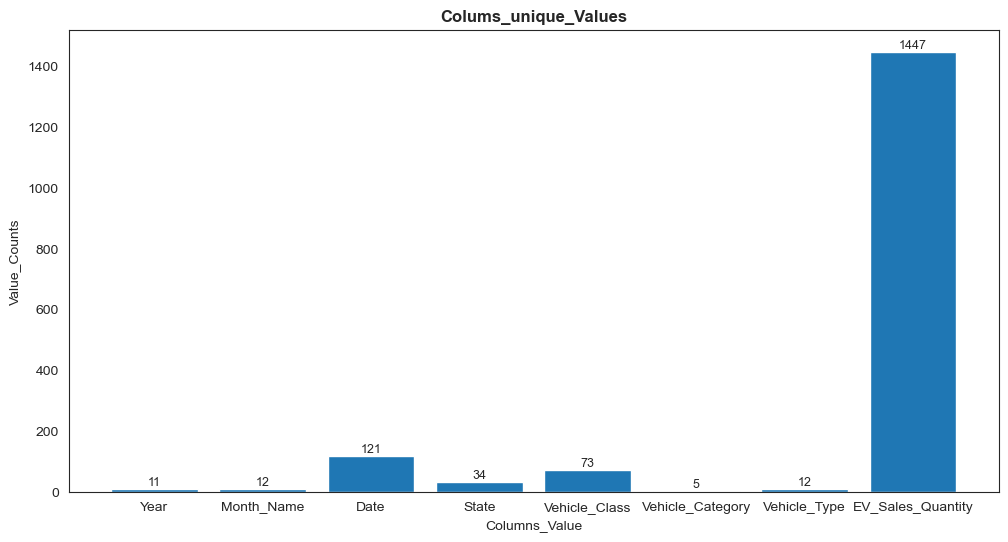

In [40]:
# Bar Graph  for unique Value checking
plt.figure(figsize = (12,6))
sns.set_style("white")
bars = plt.bar(df.columns,unique_columns_counts)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.title("Colums_unique_Values", fontweight = "bold")
plt.xlabel("Columns_Value")
plt.ylabel("Value_Counts")
plt.show()

### Removing unnecessary Data 

In [42]:
# After checking uniqueness, the Vehicle_Type column does not need to be categorized.
EDA_df = df.drop(columns = "Vehicle_Type")

In [43]:
# Drop rows where EV_Sales_Quantity is 0 to ensure accurate analysis.

In [44]:
list_of_row_deletion = EDA_df.EV_Sales_Quantity[EDA_df.EV_Sales_Quantity == 0].index

In [45]:
EDA_df_filtered = EDA_df.drop(list_of_row_deletion)

In [46]:
# Function for reset index and assign indes name and 
def reset_index(df):
    df = df.reset_index(drop = True)
    df.index = df.index+1
    df.index.name = "Id"
    return df

In [47]:
# Reset the index
EDA_df_filtered = reset_index(EDA_df_filtered)

In [48]:
EDA_df_filtered

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,EV_Sales_Quantity
Id,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,1
2,2014,Jan,2014-01-01,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,10
3,2014,Jan,2014-01-01,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2
4,2014,Jan,2014-01-01,Delhi,MOTOR CAR,4-Wheelers,5
5,2014,Jan,2014-01-01,Goa,MOTOR CAR,4-Wheelers,1
...,...,...,...,...,...,...,...
14058,2023,Dec,2023-12-01,Goa,THREE WHEELER (PERSONAL),3-Wheelers,1
14059,2023,Dec,2023-12-01,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2
14060,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,1


In [49]:
# we are going to analyse the data from the EDA_df_filtered
df = EDA_df_filtered.copy()

In [50]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,EV_Sales_Quantity
Id,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,1
2,2014,Jan,2014-01-01,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,10
3,2014,Jan,2014-01-01,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2
4,2014,Jan,2014-01-01,Delhi,MOTOR CAR,4-Wheelers,5
5,2014,Jan,2014-01-01,Goa,MOTOR CAR,4-Wheelers,1
...,...,...,...,...,...,...,...
14058,2023,Dec,2023-12-01,Goa,THREE WHEELER (PERSONAL),3-Wheelers,1
14059,2023,Dec,2023-12-01,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2
14060,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,1


### Cheking Trents

Total EV vehicles sold over time.

In [53]:
df.EV_Sales_Quantity.sum()

3593811

#### Total EV vehicles sold year-wise.

In [55]:
year_wise_sold = df[["Year","EV_Sales_Quantity"]].groupby(by = "Year").sum()
print(year_wise_sold)

      EV_Sales_Quantity
Year                   
2014               2392
2015               7805
2016              49855
2017              87420
2018             130254
2019             166819
2020             124684
2021             331498
2022            1024723
2023            1525179
2024             143182


##### Bar chart visual 

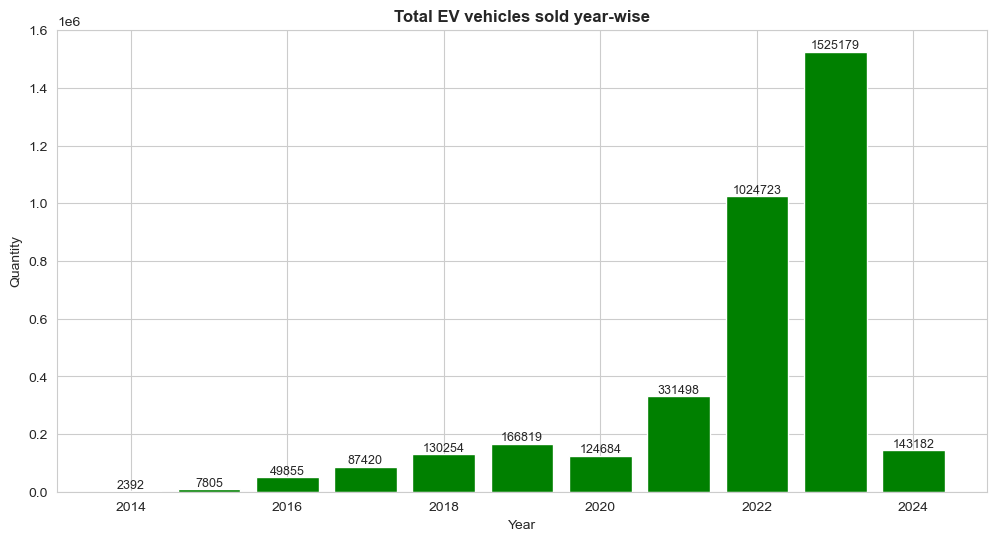

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = plt.bar(year_wise_sold.index,year_wise_sold.EV_Sales_Quantity, color = "green")
plt.title("Total EV vehicles sold year-wise", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Quantity")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.show()

#### Total EV vehicles sold month-wise.

In [59]:
month_wise_sold = df[["Month_Name","EV_Sales_Quantity"]].groupby( by = "Month_Name").sum().sort_values(by = "EV_Sales_Quantity" , ascending =False)
print(month_wise_sold)

            EV_Sales_Quantity
Month_Name                   
Nov                    382217
Dec                    364558
Jan                    360703
Oct                    355083
Sep                    313433
Mar                    299888
Aug                    294022
Jul                    270473
May                    262747
Apr                    232194
Jun                    229754
Feb                    228739


##### Bar Chart Visual

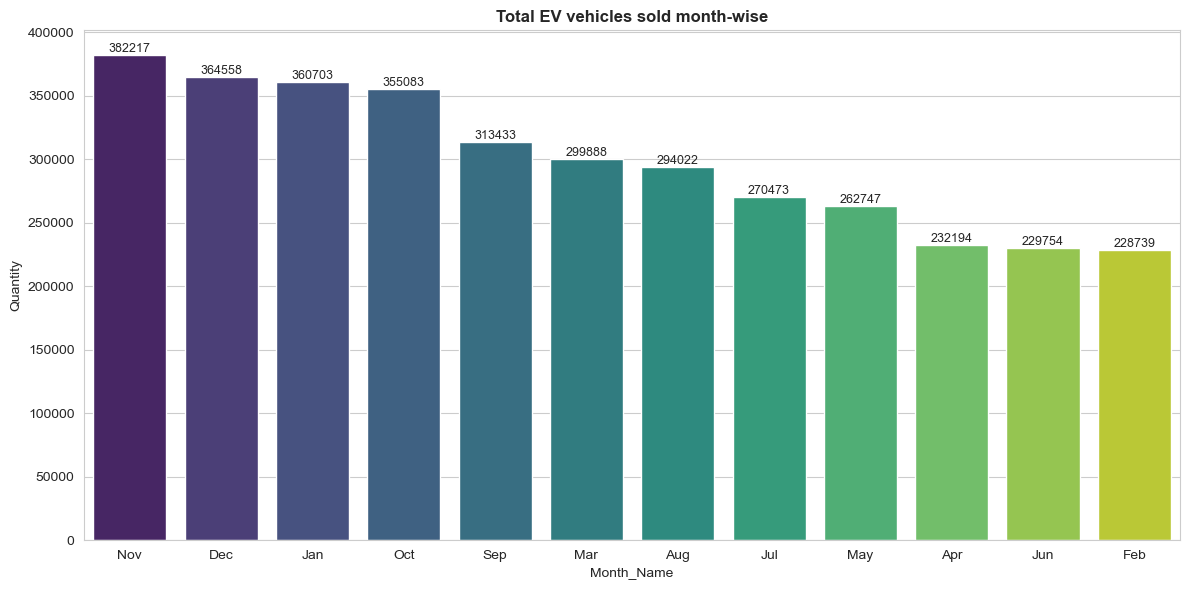

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = sns.barplot(x = month_wise_sold.index,y = month_wise_sold.EV_Sales_Quantity, data = month_wise_sold, palette = "viridis" )
plt.title("Total EV vehicles sold month-wise", fontweight = 'bold')
plt.xlabel("Month_Name")
plt.ylabel("Quantity")
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.0f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

#### Date wise sale quantity

In [63]:
date_wise_sold = df[["Date","EV_Sales_Quantity"]].groupby("Date").sum()
print(date_wise_sold)

            EV_Sales_Quantity
Date                         
2014-01-01                232
2014-02-01                171
2014-03-01                220
2014-04-01                252
2014-05-01                186
...                       ...
2023-09-01             127793
2023-10-01             139232
2023-11-01             152610
2023-12-01             141033
2024-01-01             143182

[121 rows x 1 columns]


##### Line Chat Visual

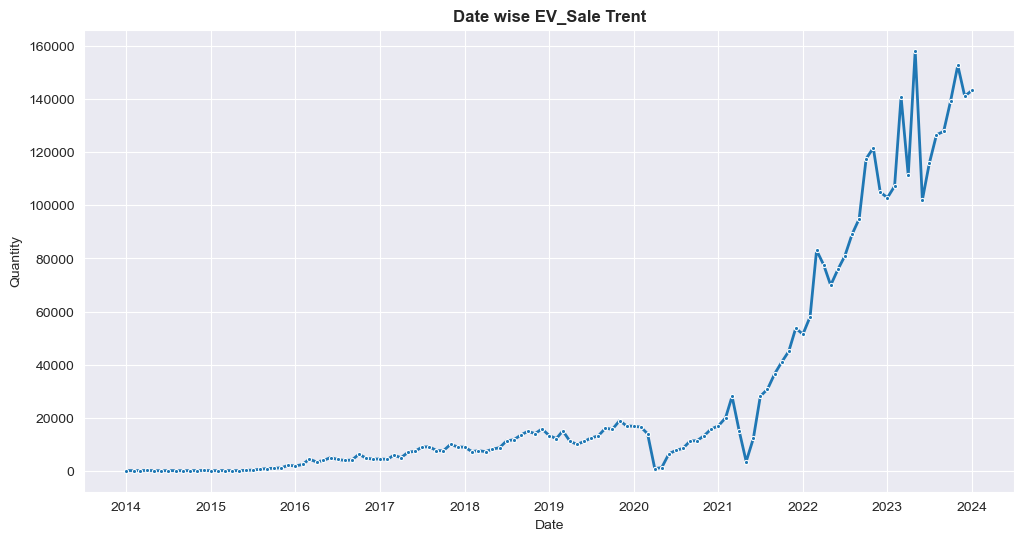

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.lineplot(x = date_wise_sold.index, y = date_wise_sold.EV_Sales_Quantity, data = date_wise_sold, marker = ".", linewidth = 2)
plt.title("Date wise EV_Sale Trent", fontweight = 'bold')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.grid (True)
plt.show()

#### State wise sold vechicle quantity

In [67]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,EV_Sales_Quantity
Id,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,1
2,2014,Jan,2014-01-01,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,10
3,2014,Jan,2014-01-01,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2
4,2014,Jan,2014-01-01,Delhi,MOTOR CAR,4-Wheelers,5
5,2014,Jan,2014-01-01,Goa,MOTOR CAR,4-Wheelers,1
...,...,...,...,...,...,...,...
14058,2023,Dec,2023-12-01,Goa,THREE WHEELER (PERSONAL),3-Wheelers,1
14059,2023,Dec,2023-12-01,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2
14060,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,1


In [68]:
State_wise_sold = df[["State","EV_Sales_Quantity"]].groupby("State").sum().sort_values("EV_Sales_Quantity", ascending = False)
print(State_wise_sold)

                          EV_Sales_Quantity
State                                      
Uttar Pradesh                        732074
Maharashtra                          401535
Karnataka                            315498
Delhi                                268538
Rajasthan                            228573
Bihar                                213465
Tamil Nadu                           206902
Gujarat                              176713
Assam                                151917
Kerala                               133246
Madhya Pradesh                       133182
Odisha                                86823
Haryana                               85250
West Bengal                           78112
Andhra Pradesh                        77356
Chhattisgarh                          75275
Uttarakhand                           57606
Punjab                                49285
Jharkhand                             47871
Tripura                               18346
Goa                             

##### Bar Chart Visual

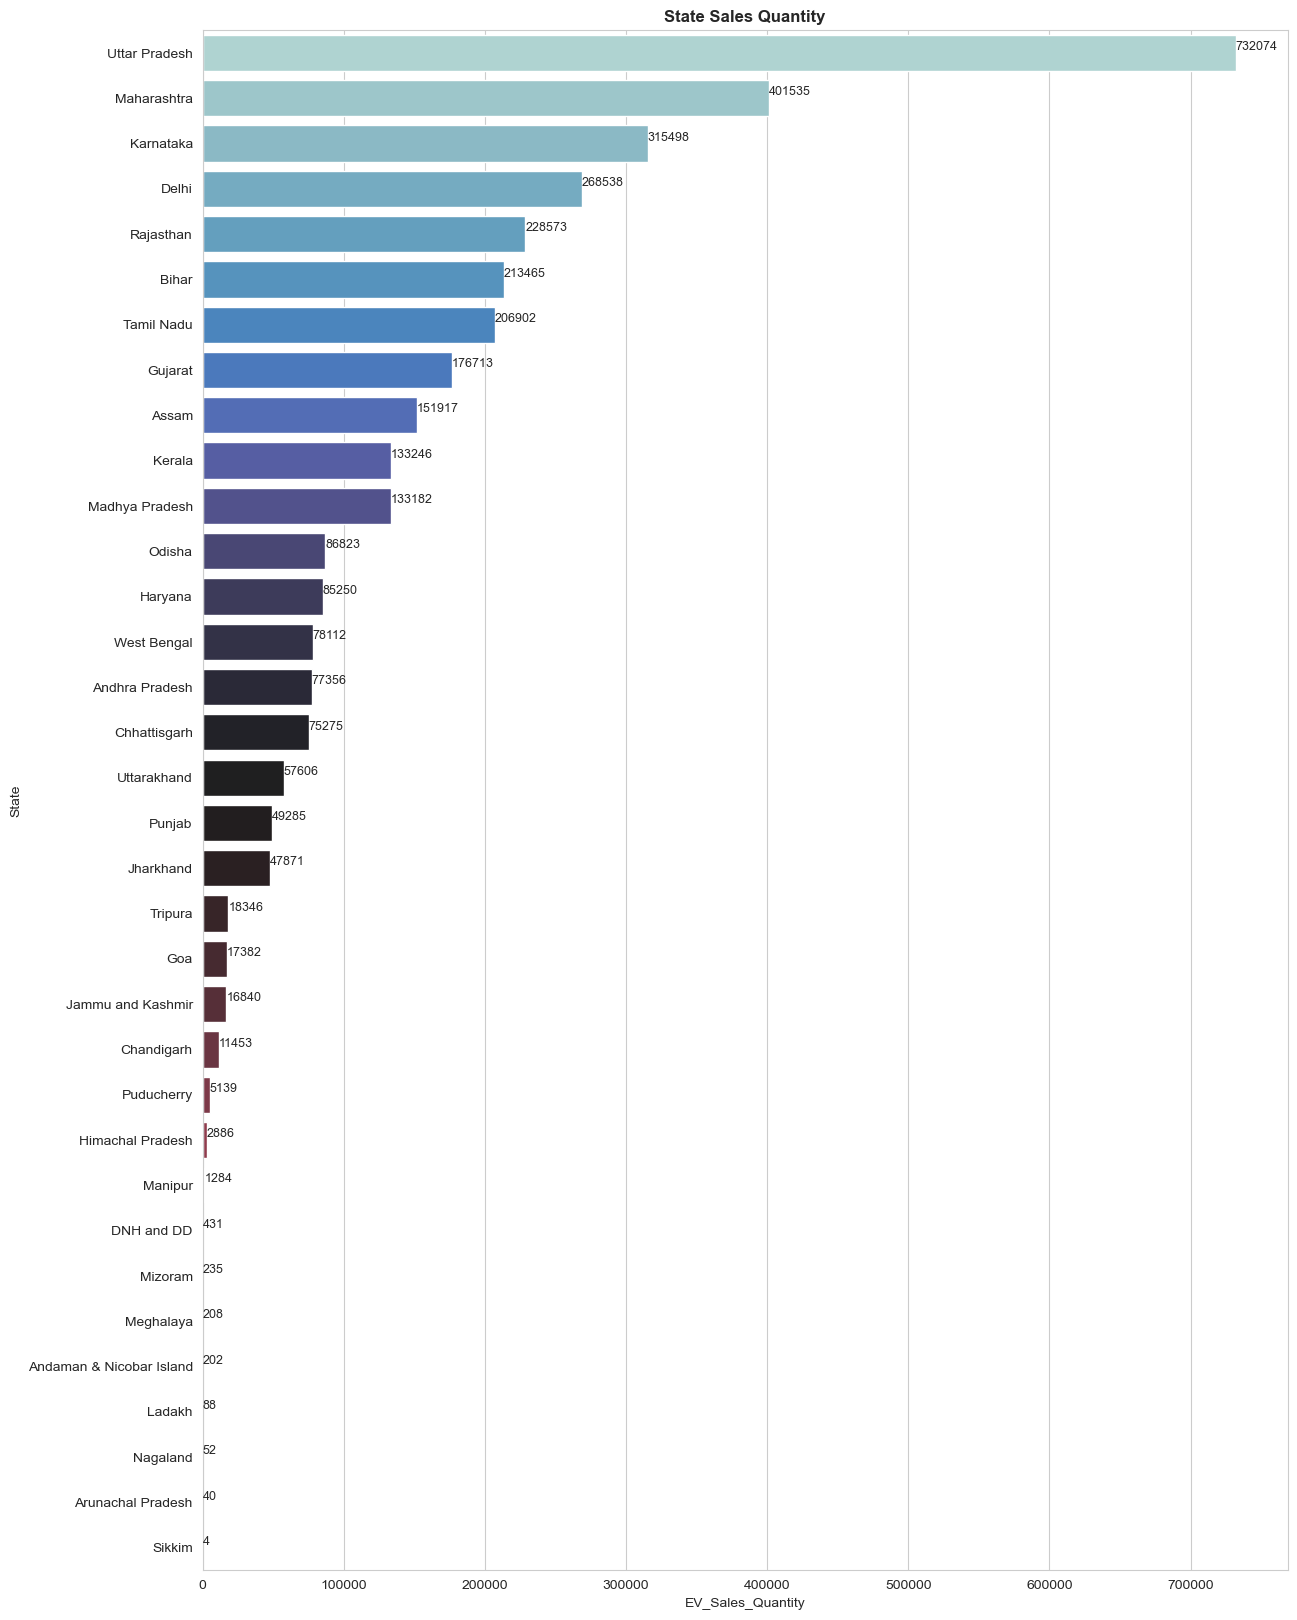

In [70]:
sns.set_style("whitegrid")
plt.figure(figsize = (14,20))
bars = sns.barplot( x = State_wise_sold.EV_Sales_Quantity  , y = State_wise_sold.index,
                 data = State_wise_sold, orient="h", palette = "icefire")
plt.title("State Sales Quantity", fontweight = "bold")
for index, value in enumerate(State_wise_sold['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)
plt.show()

#### Vechicle Class wise sold quantity

In [72]:
Vehicle_Class_wise_sold = df[["Vehicle_Class","EV_Sales_Quantity"]].groupby("Vehicle_Class").sum().sort_values("EV_Sales_Quantity", ascending = False)
print(Vehicle_Class_wise_sold)

                                          EV_Sales_Quantity
Vehicle_Class                                              
M-CYCLE/SCOOTER                                     1697373
E-RICKSHAW(P)                                       1408127
MOTOR CAR                                            130676
E-RICKSHAW WITH CART (G)                              90656
THREE WHEELER (PASSENGER)                             76132
MOPED                                                 61253
THREE WHEELER (GOODS)                                 44974
MOTORISED CYCLE (CC > 25CC)                           36390
MOTOR CAB                                             18681
MOTOR CYCLE/SCOOTER-USED FOR HIRE                     11765
BUS                                                    6891
GOODS CARRIER                                          6322
M-CYCLE/SCOOTER-WITH SIDE CAR                          1324
TRAILER (COMMERCIAL)                                    565
CONSTRUCTION EQUIPMENT VEHICLE          

##### Bar Chart Visual

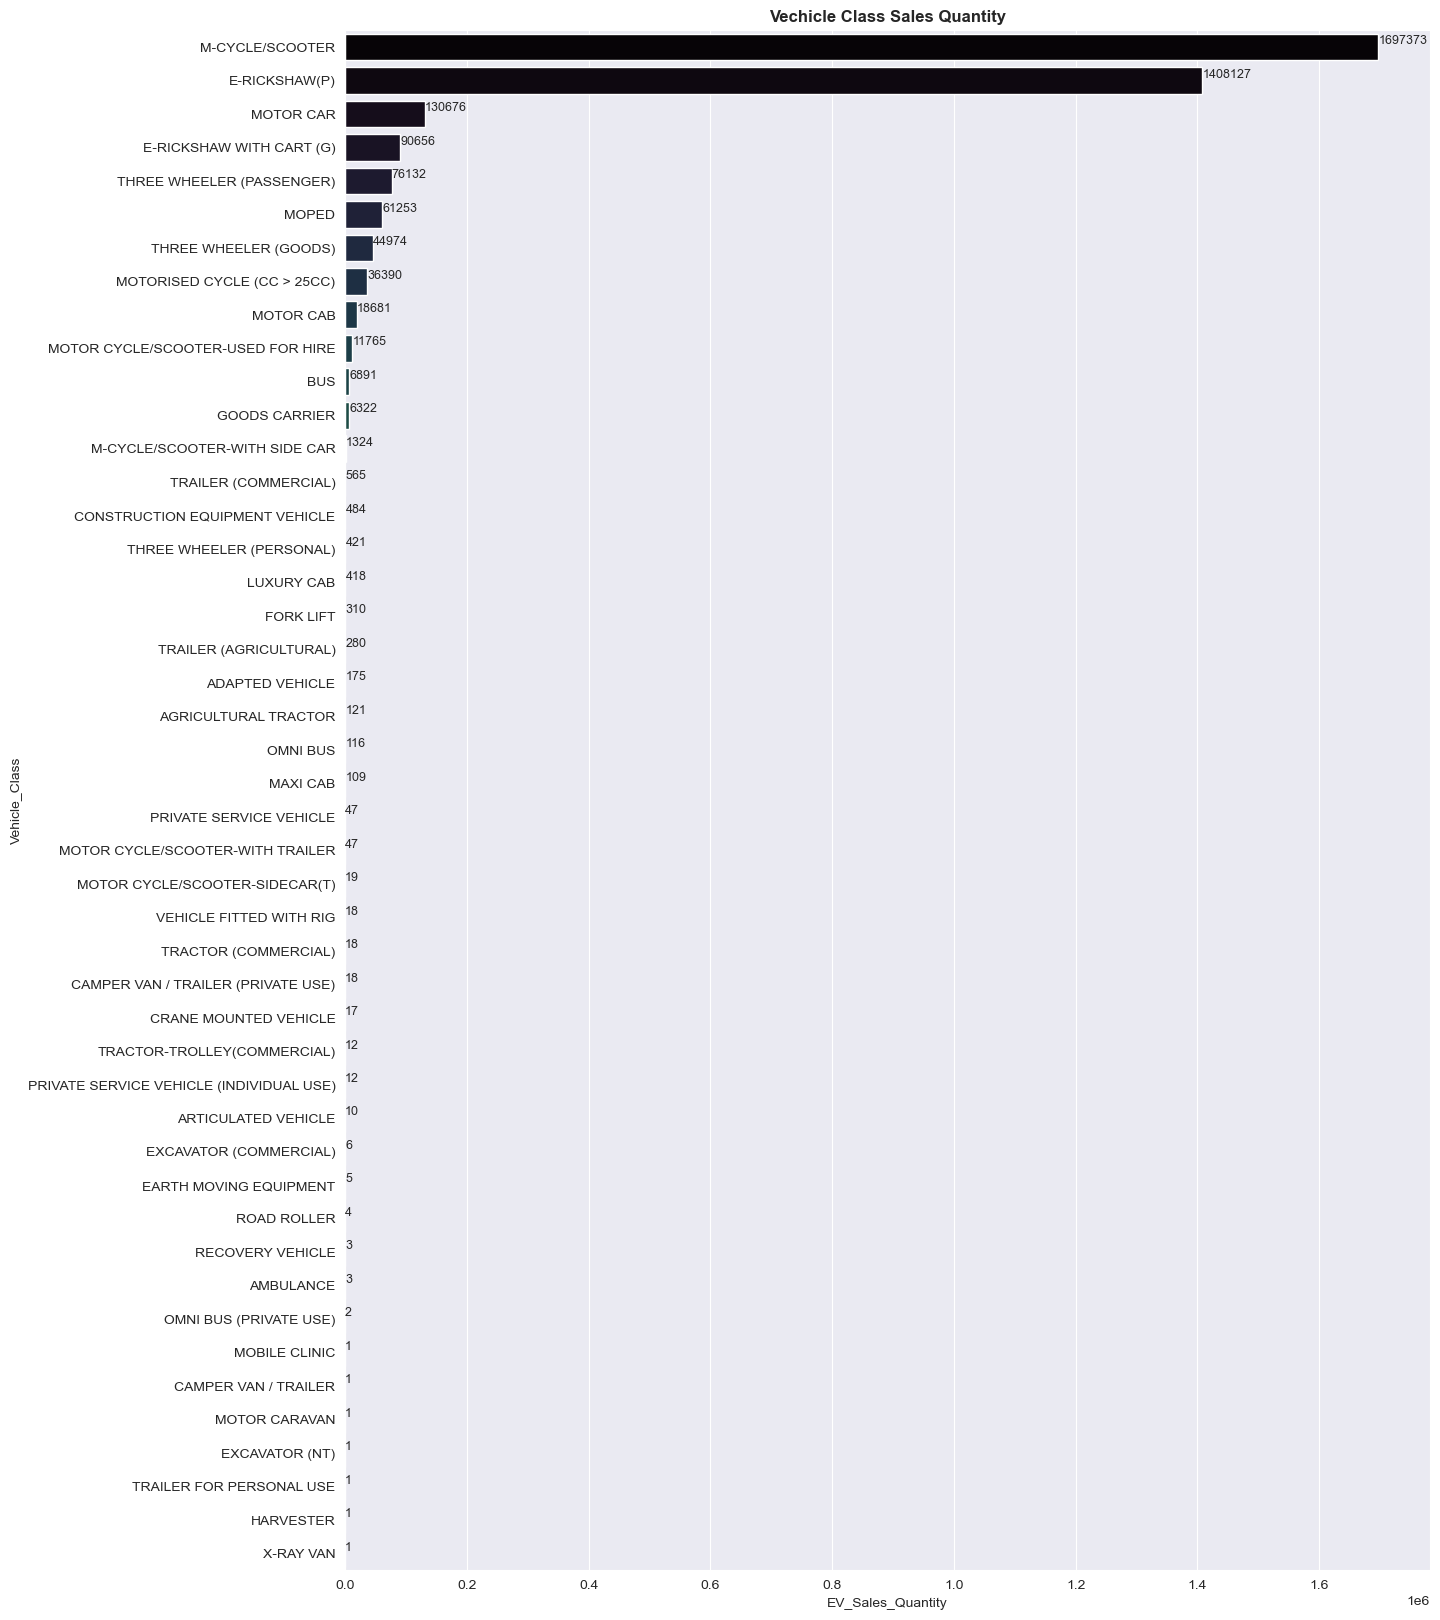

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize = (14,20))
bars = sns.barplot( x = Vehicle_Class_wise_sold.EV_Sales_Quantity  , y = Vehicle_Class_wise_sold.index,
             data = Vehicle_Class_wise_sold, orient="h", palette = "cubehelix")
plt.title("Vechicle Class Sales Quantity", fontweight = "bold")
for index, value in enumerate(Vehicle_Class_wise_sold['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)
plt.show()

#### Vechicle Category wise sold quantity

In [76]:
Vehicle_Category_wise_sold = df[["Vehicle_Category","EV_Sales_Quantity"]].groupby("Vehicle_Category").sum()
print(Vehicle_Category_wise_sold)

                  EV_Sales_Quantity
Vehicle_Category                   
2-Wheelers                  1808105
3-Wheelers                  1620310
4-Wheelers                   149775
Bus                            7009
Others                         8612


##### Bar Chart Visual

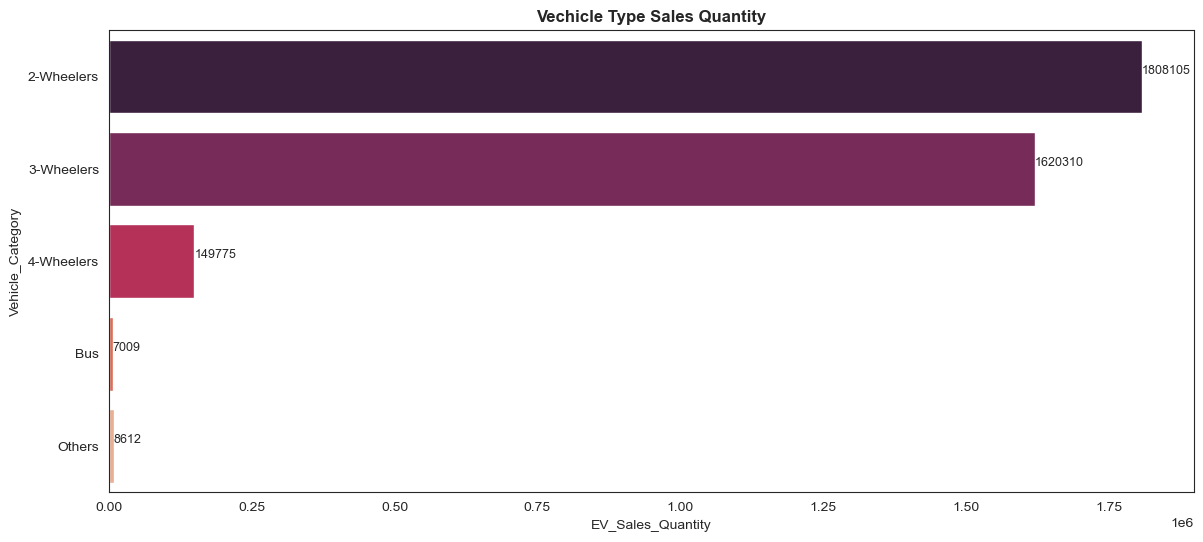

In [78]:
sns.set_style("white")
plt.figure(figsize = (14,6))
bars = sns.barplot( x = Vehicle_Category_wise_sold.EV_Sales_Quantity  , y = Vehicle_Category_wise_sold.index,
             data = Vehicle_Category_wise_sold, orient="h", palette = "rocket")
plt.title("Vechicle Type Sales Quantity", fontweight = "bold")
for index, value in enumerate(Vehicle_Category_wise_sold['EV_Sales_Quantity']):
    plt.text(value + 1, index, str(value), va='bottom', fontsize=9)


##### Pie Chart Visual

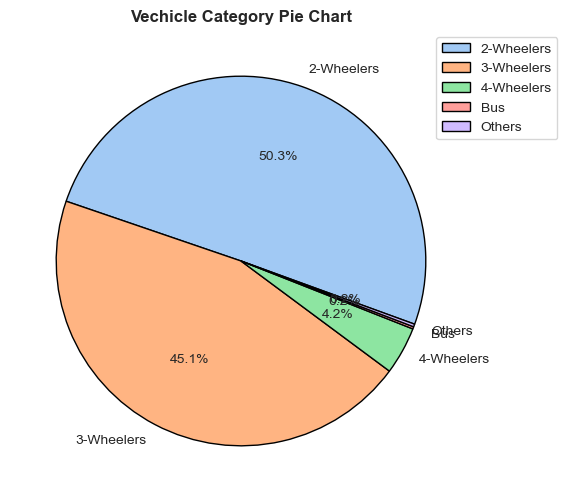

In [80]:
plt.figure(figsize = (6,6))
colors = sns.color_palette("pastel")
plt.pie(Vehicle_Category_wise_sold.EV_Sales_Quantity, labels=Vehicle_Category_wise_sold.index,
        autopct='%1.1f%%', colors = colors , startangle = -20, wedgeprops={'edgecolor': 'black'})
plt.title("Vechicle Category Pie Chart", fontweight = "bold")
plt.legend(Vehicle_Category_wise_sold.index, loc="upper right", bbox_to_anchor=(1.2, 1))


In [81]:
forecast_df = df[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df.Year = pd.to_datetime(forecast_df.Year, format = "%Y")
forecast_df = forecast_df.rename(columns={"Year" : "ds", "EV_Sales_Quantity" : "y"})
forecast_df

,ds,y
0,2014-01-01,2392
1,2015-01-01,7805
2,2016-01-01,49855
3,2017-01-01,87420
4,2018-01-01,130254
5,2019-01-01,166819
6,2020-01-01,124684
7,2021-01-01,331498
8,2022-01-01,1024723
9,2023-01-01,1525179


## Non Sold Vechicle Classes

In [83]:
df = EDA_df[["Vehicle_Class","EV_Sales_Quantity"]]
df

,Vehicle_Class,EV_Sales_Quantity
Id,,
1,ADAPTED VEHICLE,0
2,AGRICULTURAL TRACTOR,0
3,AMBULANCE,0
4,ARTICULATED VEHICLE,0
5,BUS,0
...,...,...
96841,MOTOR CAR,1
96842,MOTOR CYCLE/SCOOTER-USED FOR HIRE,5
96843,OMNI BUS,0


In [84]:
A = df[df["EV_Sales_Quantity"] == 0].groupby("Vehicle_Class").sum().sort_values("Vehicle_Class",ascending=True)
B = df[df["EV_Sales_Quantity"] != 0].groupby("Vehicle_Class").sum().sort_values("Vehicle_Class",ascending=True)

In [85]:
A

,EV_Sales_Quantity
Vehicle_Class,
ADAPTED VEHICLE,0
AGRICULTURAL TRACTOR,0
AMBULANCE,0
ANIMAL AMBULANCE,0
ARMOURED/SPECIALISED VEHICLE,0
...,...
TREE TRIMMING VEHICLE,0
VEHICLE FITTED WITH COMPRESSOR,0
VEHICLE FITTED WITH GENERATOR,0


Text(0.5, 0, 'Count of unique vales of (orderd_vechile, Non_order_vecchicle)')

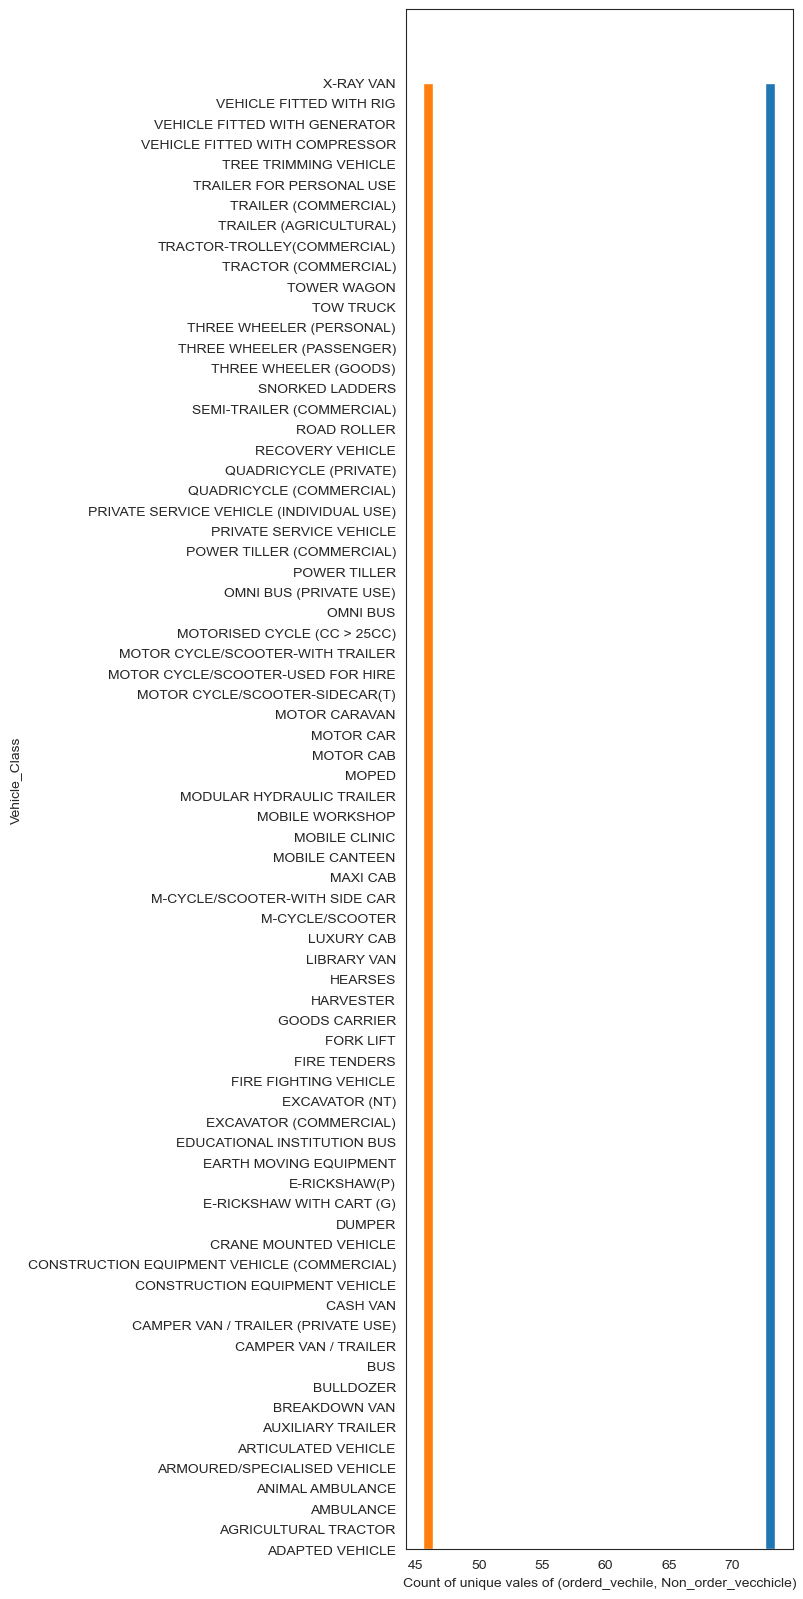

In [86]:
plt.figure(figsize = (5,20))
sns.set_style("white")
plt.bar(len(A.index),A.index)
plt.bar(len(B.index),B.index)
plt.ylabel("Vehicle_Class")
plt.xlabel("Count of unique vales of (orderd_vechile, Non_order_vecchicle)")

Non_Sold_Classes 73
Sold_Classes 46
Non_Sold_Vechicle_Classes_Over_the_Year 27
Index(['ANIMAL AMBULANCE', 'ARMOURED/SPECIALISED VEHICLE', 'AUXILIARY TRAILER',
       'BREAKDOWN VAN', 'BULLDOZER', 'CASH VAN',
       'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)', 'DUMPER',
       'EDUCATIONAL INSTITUTION BUS', 'FIRE FIGHTING VEHICLE', 'FIRE TENDERS',
       'HEARSES', 'LIBRARY VAN', 'MOBILE CANTEEN', 'MOBILE WORKSHOP',
       'MODULAR HYDRAULIC TRAILER', 'POWER TILLER',
       'POWER TILLER (COMMERCIAL)', 'QUADRICYCLE (COMMERCIAL)',
       'QUADRICYCLE (PRIVATE)', 'SEMI-TRAILER (COMMERCIAL)', 'SNORKED LADDERS',
       'TOW TRUCK', 'TOWER WAGON', 'TREE TRIMMING VEHICLE',
       'VEHICLE FITTED WITH COMPRESSOR', 'VEHICLE FITTED WITH GENERATOR'],
      dtype='object', name='Vehicle_Class')


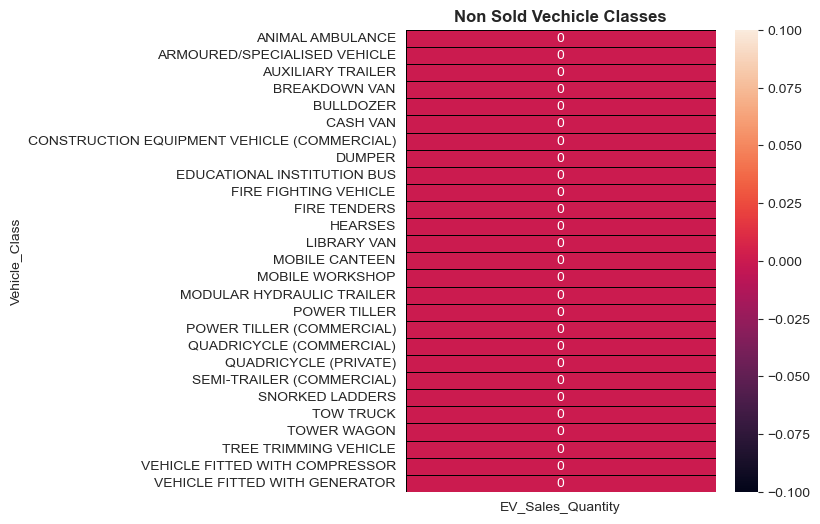

In [87]:
print("Non_Sold_Classes",len(A))
print("Sold_Classes",len(B))
print("Non_Sold_Vechicle_Classes_Over_the_Year",len(A)-len(B))
print(A[~A.index.isin(B.index)].index)
plt.figure(figsize=(5,6))
sns.heatmap(A[~A.index.isin(B.index)],annot=True,linecolor="black",linewidths=0.5)
#plt.bar(A[~A.index.isin(B.index)].EV_Sales_Quantity,A[~A.index.isin(B.index)].index)
plt.title("Non Sold Vechicle Classes",fontweight = "bold")
plt.show()

Out of 73 vehicle classes, 46 have been sold, while the remaining 27 classes have not been sold.The list of non sold Vechicle Classed shown above

## State wise improvement

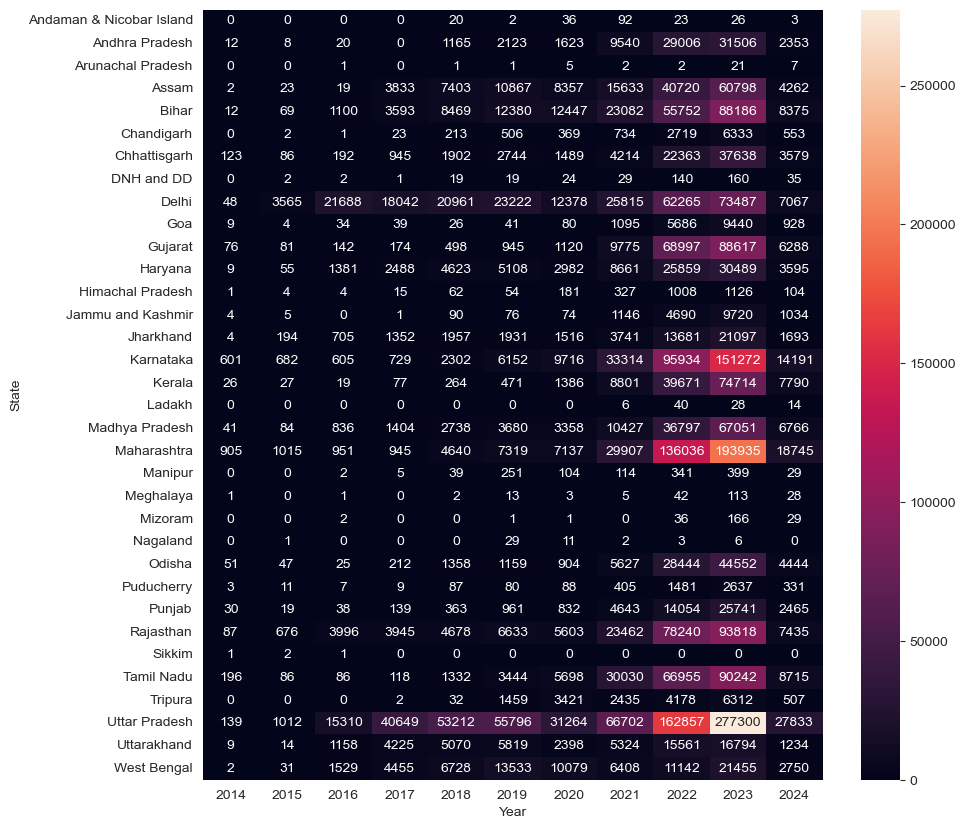

In [90]:
State_pivot = EDA_df.pivot_table(index = "State", columns = "Year", values = "EV_Sales_Quantity", aggfunc = sum )
plt.figure(figsize = (10,10))
sns.heatmap(State_pivot, annot=True, fmt=".0f")
plt.show()

       EV_Sales_Quantity
count          34.000000
mean       105700.323529
std        151862.553604
min             4.000000
25%          1684.500000
50%         53445.500000
75%        147249.250000
max        732074.000000


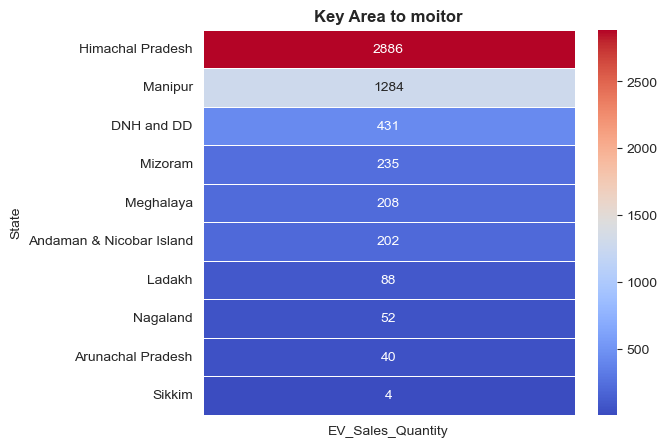

In [91]:
print(State_wise_sold.describe())
plt.figure(figsize = (6,5))
sns.heatmap(State_wise_sold.tail(10),annot=True,cmap="coolwarm",linewidths=0.5,fmt=".0f")
plt.title("Key Area to moitor",fontweight = "bold")
plt.show()

These are the key areas that need to be concentrated on to drive more sales.

## Regression Analysis

In [94]:
# import Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [95]:
# Convert categorical variable to numeric using encoding

df = pd.get_dummies(EDA_df, columns = ["State", "Vehicle_Class", "Vehicle_Category"],drop_first = True)

# future & target variables

X = df.drop(columns = ["Month_Name", "Date", "EV_Sales_Quantity"])  # independent variable

y = df["EV_Sales_Quantity"] # dependent variable

# split the data to taraining & testing 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
# Train the model

model = LinearRegression() # Initialize
model.fit(X_train, y_train) # Train

LinearRegression()

In [97]:
# Predict sales

y_pred = model.predict(X_test)
y_pred

array([ 37.421875, -66.546875,  40.9375  , ..., -25.953125, 694.3125  ,
       -42.5     ])

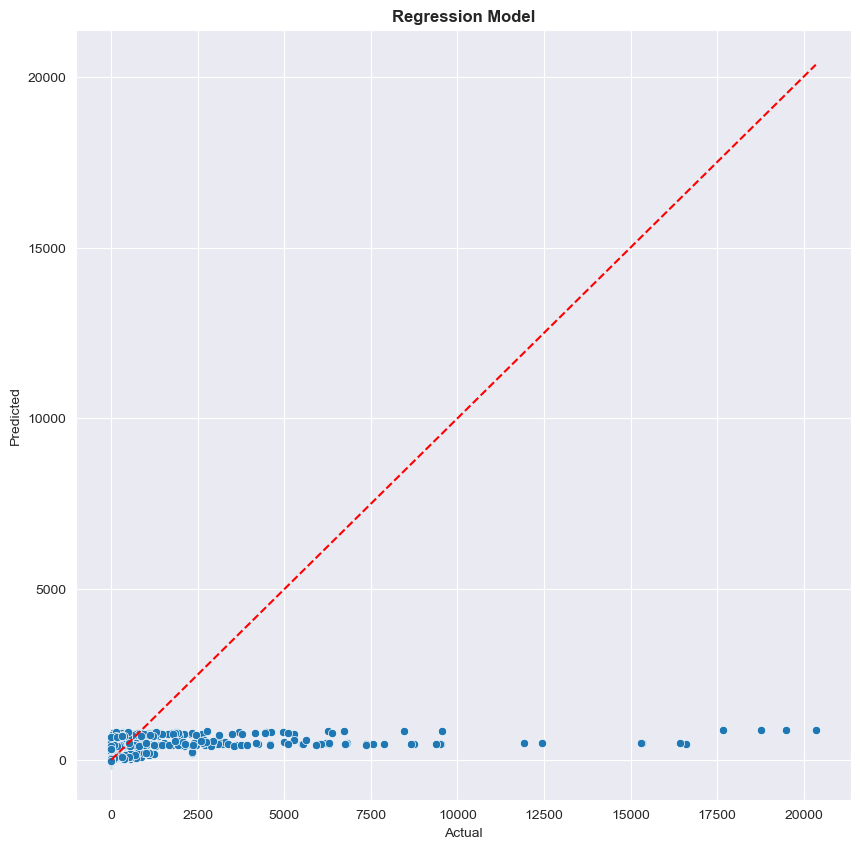

In [98]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,10))
sns.scatterplot( x = y_test, y= y_pred)
sns.lineplot( x = y_test, y = y_test, color = 'red',linestyle = 'dashed')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression Model",fontweight = "bold")
plt.show()

Blue Dots: Actual vs. Predicted sales data points.
Red Dashed Line: Perfect prediction (if all points were on this line, the model would be perfect).
Deviation: The farther the blue points are from the red line, the more error in predictions.

Mean Absolute Error: 89.17268896174299
Mean Squared Error: 234396.54691122595
Root Mean Squared Error: 484.145171318713
R-squared: 0.09988270938313049


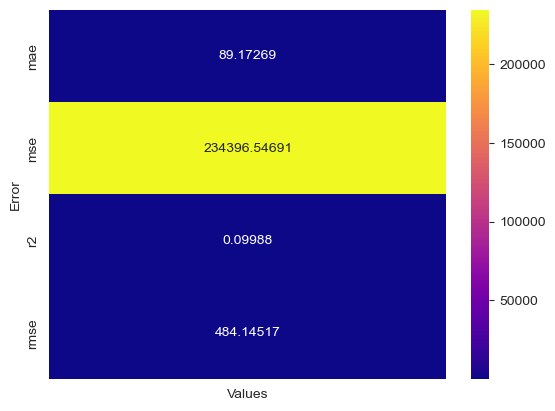

In [100]:
# Calculate errors
mae = float(mean_absolute_error(y_test, y_pred))
mse = float(mean_squared_error(y_test, y_pred))
rmse = float(np.sqrt(mse))
r2 = float((r2_score(y_test, y_pred)))

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

df = pd.DataFrame ({"Error" : ["mae", "mse", "rmse", "r2"],"Values" : [mae, mse, rmse, r2]})
sns.heatmap(df.pivot_table(index = "Error", values = "Values"),cmap = "plasma", annot = True, fmt=".5f" )
plt.show()


#### 1️⃣ Mean Absolute Error (MAE)
Measures the average absolute difference between actual (y_test) and predicted (y_pred) values.
Lower MAE means better predictions.
It gives equal weight to all errors, making it easy to interpret.
✅ Example: If MAE = 5, on average, your model’s prediction is off by 5 units.

#### 2️⃣ Mean Squared Error (MSE)
Measures the average squared differences between actual and predicted values.
Squaring penalizes larger errors more than smaller ones.
Lower MSE means a better model, but its scale is different from the original data.
✅ Example: If MSE = 25, it means the squared error is 25 on average.

#### 3️⃣ Root Mean Squared Error (RMSE)
he square root of MSE to bring the error back to the same scale as the data.
More sensitive to large errors than MAE.
Lower RMSE means better predictions.
✅ Example: If RMSE = 5, the typical prediction error is 5 units.

#### 4️⃣ R-Squared (R² Score)
Measures how well the model explains the variance in the data.
Ranges from 0 to 1 (sometimes negative if the model is very bad).
R² = 1 → Perfect fit
R² = 0 → Model explains nothing
Negative R² → Model performs worse than a simple mean
✅ Example: If R² = 0.85, it means 85% of the variance in y_test is explained by the model.


#### Metric	Interpretation
MAE	- Average absolute error (lower is better)
MSE	- Average squared error (penalizes large errors)
RMSE - Standardized error (same unit as data)
R² Score - How well the model explains the variance (closer to 1 is better)


## Forecast

In [103]:
forecast_df = EDA_df[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df.Year = pd.to_datetime(forecast_df.Year, format = "%Y")
forecast_df = forecast_df.rename(columns={"Year" : "ds", "EV_Sales_Quantity" : "y"})
forecast_df

,ds,y
0,2014-01-01,2392
1,2015-01-01,7805
2,2016-01-01,49855
3,2017-01-01,87420
4,2018-01-01,130254
5,2019-01-01,166819
6,2020-01-01,124684
7,2021-01-01,331498
8,2022-01-01,1024723
9,2023-01-01,1525179


In [104]:
from prophet import Prophet # import model

model = Prophet() # Initialize the Prophet model

model.fit(forecast_df) # Fir the model on data

future = model.make_future_dataframe(periods = 5, freq = 'Y') # Create Data frame of future 5 year

forecast = model.predict(future) # Predict the future value

forecast

11:15:40 - cmdstanpy - INFO - Chain [1] start processing
11:15:41 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,-3.695188e+05,-558260.809423,3.178791e+05,-3.695188e+05,-3.695188e+05,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,0.0,0.0,0.0,-1.043055e+05
1,2015-01-01,-2.733459e+05,-523417.513696,3.966821e+05,-2.733459e+05,-2.733459e+05,191469.651551,191469.651551,191469.651551,191469.651551,191469.651551,191469.651551,0.0,0.0,0.0,-8.187621e+04
2,2016-01-01,-1.771729e+05,-532964.083119,3.851799e+05,-1.771729e+05,-1.771729e+05,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,0.0,0.0,0.0,-6.714059e+04
3,2017-01-01,-8.073641e+04,-184611.229594,6.872912e+05,-8.073641e+04,-8.073641e+04,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,0.0,0.0,0.0,2.504376e+05
4,2018-01-01,1.543657e+04,-135497.559891,7.451163e+05,1.543657e+04,1.543657e+04,265213.376310,265213.376310,265213.376310,265213.376310,265213.376310,265213.376310,0.0,0.0,0.0,2.806499e+05
5,2019-01-01,1.116095e+05,-154925.879216,7.794260e+05,1.116095e+05,1.116095e+05,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,0.0,0.0,0.0,3.030792e+05
6,2020-01-01,2.077825e+05,-134882.838268,7.704729e+05,2.077825e+05,2.077825e+05,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,0.0,0.0,0.0,3.178148e+05
7,2021-01-01,3.042190e+05,157981.258985,1.107326e+06,3.042190e+05,3.042190e+05,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,0.0,0.0,0.0,6.353930e+05
8,2022-01-01,4.003920e+05,224740.344626,1.086244e+06,4.003920e+05,4.003920e+05,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,0.0,0.0,0.0,6.656054e+05
9,2023-01-01,4.965650e+05,236501.869179,1.148565e+06,4.965650e+05,4.965650e+05,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,0.0,0.0,0.0,6.880346e+05


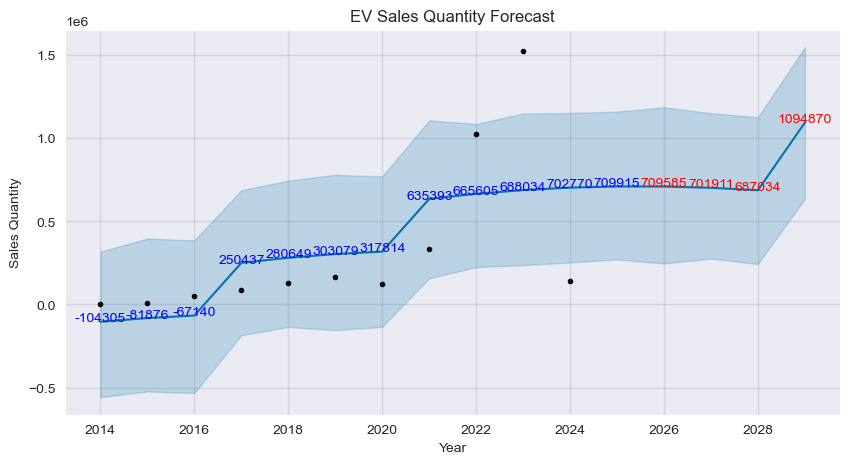

In [105]:

fig, ax = plt.subplots(figsize=(10, 5))
model.plot(forecast, ax=ax)

# Annotate actual and predicted values
for i, row in forecast.iterrows():
    if row['ds'].year in forecast_df["ds"].dt.year.values:
        color = "blue"  # Actual data points
    else:
        color = "red"   # Predicted values
    ax.text(row['ds'], row['yhat'], f"{int(row['yhat'])}", color=color, fontsize=10, ha='center')


plt.title('EV Sales Quantity Forecast')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.show()

In [106]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,-3.695188e+05,-558260.809423,3.178791e+05,-3.695188e+05,-3.695188e+05,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,0.0,0.0,0.0,-1.043055e+05
1,2015-01-01,-2.733459e+05,-523417.513696,3.966821e+05,-2.733459e+05,-2.733459e+05,191469.651551,191469.651551,191469.651551,191469.651551,191469.651551,191469.651551,0.0,0.0,0.0,-8.187621e+04
2,2016-01-01,-1.771729e+05,-532964.083119,3.851799e+05,-1.771729e+05,-1.771729e+05,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,0.0,0.0,0.0,-6.714059e+04
3,2017-01-01,-8.073641e+04,-184611.229594,6.872912e+05,-8.073641e+04,-8.073641e+04,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,0.0,0.0,0.0,2.504376e+05
4,2018-01-01,1.543657e+04,-135497.559891,7.451163e+05,1.543657e+04,1.543657e+04,265213.376310,265213.376310,265213.376310,265213.376310,265213.376310,265213.376310,0.0,0.0,0.0,2.806499e+05
5,2019-01-01,1.116095e+05,-154925.879216,7.794260e+05,1.116095e+05,1.116095e+05,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,0.0,0.0,0.0,3.030792e+05
6,2020-01-01,2.077825e+05,-134882.838268,7.704729e+05,2.077825e+05,2.077825e+05,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,110032.291455,0.0,0.0,0.0,3.178148e+05
7,2021-01-01,3.042190e+05,157981.258985,1.107326e+06,3.042190e+05,3.042190e+05,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,331174.039072,0.0,0.0,0.0,6.353930e+05
8,2022-01-01,4.003920e+05,224740.344626,1.086244e+06,4.003920e+05,4.003920e+05,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,265213.376309,0.0,0.0,0.0,6.656054e+05
9,2023-01-01,4.965650e+05,236501.869179,1.148565e+06,4.965650e+05,4.965650e+05,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,191469.651550,0.0,0.0,0.0,6.880346e+05


### Understanding the Forecast Output

ds: The forecasted date (year).

yhat: The predicted sales quantity.

yhat_lower and yhat_upper: The lower and upper bounds of the confidence interval.



### Residual Analysis
yhat (Predicted Sales): These are the forecasted EV sales for each year.
y (Actual Sales): The real EV sales data from historical records.

Residual Calculation:
Residual = Predicted Sales − Actual Sales
Residual=Predicted Sales−Actual Sales

If residuals are close to zero, the model is accurate.
Large positive residuals indicate overprediction (forecast is too high).
Large negative residuals indicate underprediction (forecast is too low).

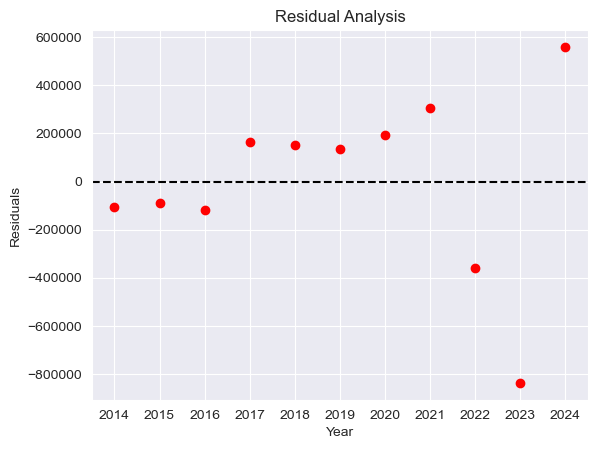

In [109]:
forecast['residuals'] = forecast['yhat'] - forecast_df['y']
plt.scatter(forecast['ds'], forecast['residuals'], color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()